# History Matching for L96
Author : Redaoune Lguensat, Homer Durand

Date : 26-07-21

### Loading libs

In [1]:
PATH = '/home/homer/anaconda3/envs/HM-env/bin/python'
Sys.setenv(RETICULATE_PYTHON = PATH)

current_dir <- getwd()
mogp_dir <- current_dir #mogp_emulator lib : https://github.com/alan-turing-institute/mogp-emulator

setwd(paste0(current_dir, '/dev_ExeterUQ_MOGP/')) #devel version og ExeterUQ_MOGP : https://github.com/BayesExeter/ExeterUQ_MOGP/tree/devel

source("BuildEmulator/BuildEmulator.R")
source("HistoryMatching/HistoryMatching.R")
source("HistoryMatching/impLayoutplot.R")

setwd(current_dir)

r_packages <- c("future.apply", 'tgp', 'ANN2', 'MLmetrics', 'keras')
invisible(lapply(r_packages, library, character.only = TRUE))

python_pkg <- c("L96_amip", "numpy", "sklearn", "skopt.sampler", "skopt.space")
python_pkg_names <- c("L96_amip", "np", "sklearn", "sampler", "skSpace")
for(i in seq(length(python_pkg))){assign(python_pkg_names[i], import(python_pkg[i]))}

far library : Modelization for Functional AutoRegressive processes

version 0.6-4 (2014-12-07)

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 

Attaching package: ‘maps’

The following object is masked from ‘package:viridis’:

    unemp


Attaching package: ‘mvtnorm’

The following object is masked from ‘package:spam’:

    rmvnorm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ncdf4’”This is loo version 2.4.1
- Online documentation and vignettes at mc-stan.org/loo
- As of v2.0.0 loo defa

In [2]:
np$random$seed(as.integer(42))

X_init = 10*np$ones(as.integer(36))
X_init[19]=1.0001 #ATtention X_init[19] !!!

l96_two = L96_amip$L96TwoLevel(save_dt=0.001, X_init=X_init, integration_type='coupled') # True params J=10, h=1, F=10, c=10, b=10

In [3]:
l96_two$iterate(10)

In [4]:
Newinit = l96_two$X

In [5]:
np$random$seed(as.integer(42))
n_iter <- 200
dt <- 0.001
l96_two = L96_amip$L96TwoLevel(save_dt=dt, X_init=Newinit, integration_type='coupled') 

In [6]:
l96_two$iterate(n_iter)

In [7]:
X_hist <- l96_two$history$X$values

In [8]:
observations_amip <- l96_two$mean_stats(ax=as.integer(0))
observations <- l96_two$mean_stats(ax=as.integer(0), amip_metrics=FALSE)

In [9]:
NRMSE <- function(y, ychap) {sqrt((1/length(ychap))*sum((ychap-y)**2/ychap))}

In [10]:
plan(multicore)

In [25]:
mses_amip <- c()
mses <- c()
l96_two = L96_amip$L96TwoLevel(save_dt=dt, X_init=Newinit, integration_type='coupled')

for(i in seq(50)){
    l96_two$iterate(4)
    obs_amip <- l96_two$mean_stats(ax=as.integer(0))
    obs <- l96_two$mean_stats(ax=as.integer(0), amip_metrics=FALSE)

    mses <- append(mses, NRMSE(observations, obs))
    mses_amip <- append(mses_amip,NRMSE(observations_amip, obs_amip))
}

In [26]:
library(ggplot2)
library(ggtext)

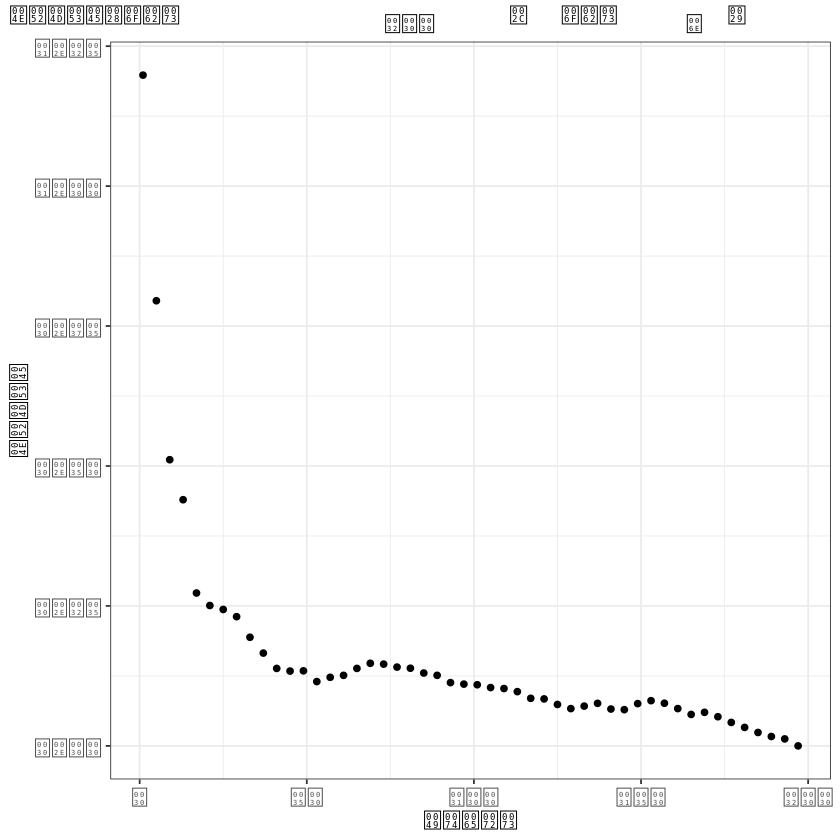

In [27]:
df_mse <- as.data.frame(list(mses, seq(1,200,4)))
names(df_mse) <- c('NRMSE', 'Iters')
ggplot(df_mse, aes(x=Iters, y=NRMSE)) + geom_point() + 
  labs(
    title = "NRMSE(obs<sub>200</sub>, obs<sub>n</sub>) "
  ) +
  theme_bw() +
  theme(
    plot.title.position = "plot",
    plot.title = element_markdown(size = 11, lineheight = 1.2)
  )

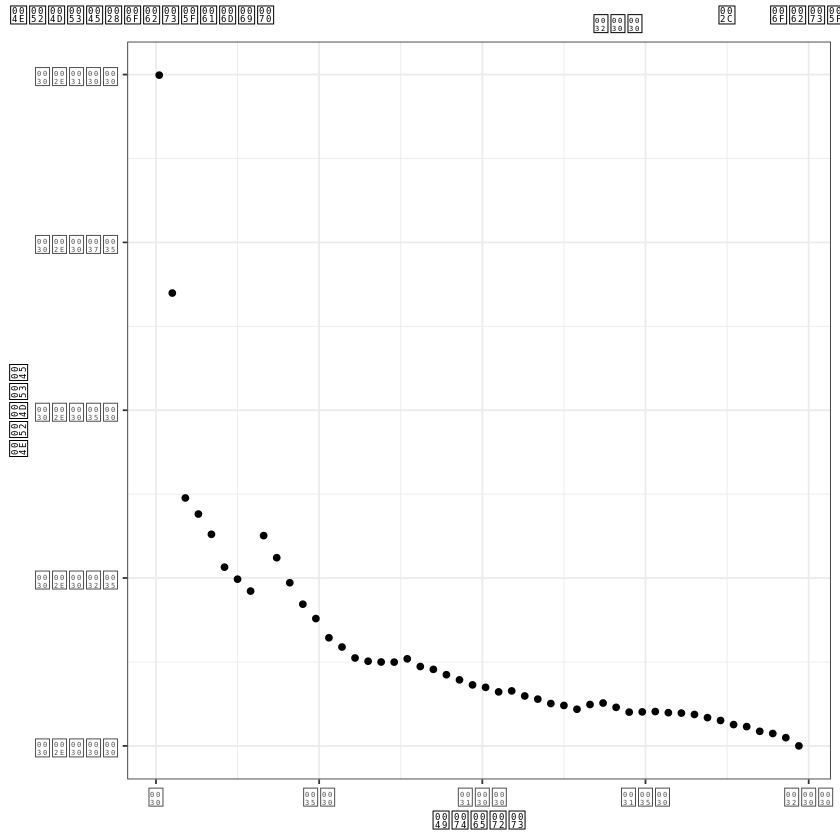

In [29]:
df_mse <- as.data.frame(list(mses_amip, seq(1,200,4)))
names(df_mse) <- c('NRMSE', 'Iters')
ggplot(df_mse, aes(x=Iters, y=NRMSE)) + geom_point() + 
  labs(
    title = "NRMSE(obs_amip<sub>200</sub>, obs_amip<sub>n</sub>) "
  ) +
  theme_bw() +
  theme(
    plot.title.position = "plot",
    plot.title = element_markdown(size = 11, lineheight = 1.2)
  )